In [3]:
import pandas as pd
import seaborn as sns
import numpy as np


 <div style="display: flex; background-color: RGB(72,209,204);" >
<h1 style="margin: auto; padding: 30px; ">Il vous faudra faire un peu de nettoyage ! </h1>
</div>

Vous devrez faire des choix quant au traitement des valeurs manquantes et des valeurs aberrantes

In [4]:
df_clients = pd.read_csv('clients.csv')
df_produits = pd.read_csv('produits.csv')
df_ventes = pd.read_csv('ventes.csv')

<div style="display: flex; background-color: RGB(72,209,204);" >
<h1 style="margin: auto; padding: 1px; ">Vérification de 1er tableau </h1>
</div>

In [5]:

df_clients.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [6]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [7]:
df_clients.isnull().sum().sort_values(ascending=False)/len(df_clients)

client_id    0.0
sex          0.0
birth        0.0
dtype: float64

In [8]:
len(df_clients)

8623

In [9]:
df_clients = df_clients.drop_duplicates()
len(df_clients)

8623

In [10]:
(df_clients.birth.isnull().sum()/len(df_clients))*100

0.0

<div style="display: flex; background-color: RGB(72,209,204);" >
<h1 style="margin: auto; padding: 1px; ">Vérification de 2ème tableau </h1>
</div>

In [11]:
df_produits.head()
df_produits.price.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
3282    False
3283    False
3284    False
3285    False
3286    False
Name: price, Length: 3287, dtype: bool

<AxesSubplot:>

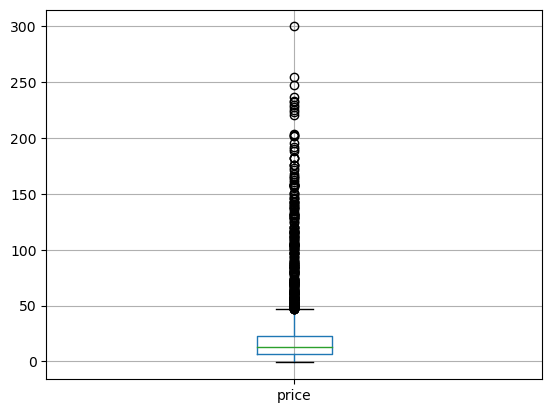

In [12]:
df_produits[['price']].boxplot()

In [13]:
df_produits['price'].min()

-1.0

In [14]:
false_observe = df_produits['price'].argmin()
false_observe

731

In [15]:
df_produits = df_produits.drop(false_observe).reset_index(drop=True)

In [16]:
df_produits['price'].min()

0.62

<div style="display: flex; background-color: RGB(72,209,204);" >
<h1 style="margin: auto; padding: 1px; ">Vérification de 3ème tableau </h1>
</div>

In [17]:
df_ventes.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [18]:
df_ventes.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [19]:
len(df_ventes)

337016

In [20]:
df_ventes.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
337011    False
337012    False
337013    False
337014    False
337015    False
Length: 337016, dtype: bool

In [21]:
df_ventes.drop_duplicates()
len(df_ventes)

337016

<div style="display: flex; background-color: RGB(72,209,204);" >
<h1 style="margin: auto; padding: 1px; ">Final DATA </h1>
</div>

In [22]:
df_clients.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [23]:
df_produits.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [24]:
df_ventes.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [25]:
df_ventes_produits = df_ventes.merge(df_produits)
final_data = df_ventes_produits.merge(df_clients)
final_data

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0,f,1977
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0,f,1977
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0,f,1977
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0,f,1977
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0,f,1977
...,...,...,...,...,...,...,...,...
336708,1_607,2021-09-25 07:26:00.224331,s_95185,c_4786,26.99,1,f,1967
336709,1_673,2021-06-01 00:49:49.781631,s_42350,c_2793,12.99,1,m,1933
336710,0_2075,2021-10-09 09:03:48.268536,s_102200,c_2793,8.99,0,m,1933
336711,0_1692,2021-09-15 19:42:08.596375,s_90430,c_4478,13.36,0,f,1970


In [28]:
final_data.to_csv("final_data.csv")
df_final =pd.read_csv('final_data.csv')
df_final.head()

,Unnamed: 0,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0,f,1977
1,1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0,f,1977
2,2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0,f,1977
3,3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0,f,1977
4,4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0,f,1977
